<a href="https://colab.research.google.com/github/johncduran/datasci_6_regression/blob/main/HHA_507_WK_7_Assignment_6b_Simple_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing

In [1]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from statsmodels.stats.diagnostic import linear_rainbow
from scipy.stats import shapiro
from statsmodels.stats.diagnostic import het_goldfeldquandt

Here I am importing all the necessary packages to analyze the dataset.

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/johncduran/datasci_6_regression/main/COVID_19_Hospitalization_Trends_Report_Data_file_20230602.csv')
df



,Year,Month,Bene_Geo_Desc,Bene_Race_Desc,Bene_Sex_Desc,Bene_Mdcr_Entlmt_Stus,Bene_Age_Desc,Bene_RUCA_Desc,Total_Hosp,Total_Enrl,Total_Hosp_Per100K,Avg_LOS
0,2020,Overall,National,All,All,All,All,All,986377.0,6.251189e+07,1577.9030,10.6439
1,2020,Overall,National,All,All,All,All,Rural,189268.0,1.206914e+07,1568.1985,9.7550
2,2020,Overall,National,All,All,All,All,Urban,794694.0,4.981956e+07,1595.1445,10.8475
3,2020,Overall,National,All,All,All,All,Unknown,NaN,8.223233e+04,NaN,NaN
4,2020,Overall,National,All,All,All,0-64,All,130536.0,8.319817e+06,1568.9768,11.7848
...,...,...,...,...,...,...,...,...,...,...,...,...
54256,2022,Second half,Virginia,All,All,All,All,Unknown,NaN,1.248800e+04,NaN,NaN
54257,2022,Second half,Washington,All,All,All,All,Unknown,NaN,1.807000e+03,NaN,NaN
54258,2022,Second half,West Virginia,All,All,All,All,Unknown,NaN,3.602000e+03,NaN,NaN
54259,2022,Second half,Wisconsin,All,All,All,All,Unknown,NaN,7.510000e+02,NaN,NaN


Here I am using pandas to read the dataset that contains two categories of continous variables 'Total_Hosp' and 'Avg_LOS'.

# Cleanup

In [4]:
df.describe()


,Year,Total_Hosp,Total_Enrl,Total_Hosp_Per100K,Avg_LOS
count,54261.000000,4.356400e+04,5.409100e+04,43529.000000,40454.000000
mean,2021.000000,4.871266e+03,1.972652e+06,315.248420,10.672833
std,0.816504,3.038648e+04,1.160444e+07,4664.812388,3.895076
min,2020.000000,0.000000e+00,0.000000e+00,0.000000,3.500000
25%,2020.000000,7.300000e+01,2.427650e+04,56.500600,8.866125
50%,2021.000000,3.440000e+02,1.847740e+05,125.274000,10.084850
75%,2022.000000,1.502000e+03,7.760705e+05,240.982800,11.545500
max,2022.000000,1.150216e+06,3.418546e+08,619926.199300,164.518500


I am using '.describe' to get more information on the values within the dataset.

In [5]:
df.dropna(inplace=True)

Here I am getting rid of any missing rows as to not modify the statistical analysis.

# Analysis

In [6]:

X = sm.add_constant(df['Total_Hosp'])
print(X)
model = sm.OLS(df['Avg_LOS'], X)
print(model)




       const  Total_Hosp
0        1.0    986377.0
1        1.0    189268.0
2        1.0    794694.0
4        1.0    130536.0
5        1.0    342290.0
...      ...         ...
53542    1.0       234.0
53543    1.0       234.0
53544    1.0       194.0
53545    1.0       462.0
53546    1.0       268.0

[40447 rows x 2 columns]


Here I am adding a constant to the independent variable of 'Total_Hosp' and combining that with the dependent variable into a model.

In [7]:
results = model.fit()
print(results.summary())



                            OLS Regression Results                            
Dep. Variable:                Avg_LOS   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     43.65
Date:                Sun, 26 Nov 2023   Prob (F-statistic):           3.97e-11
Time:                        18:58:56   Log-Likelihood:            -1.1237e+05
No. Observations:               40447   AIC:                         2.247e+05
Df Residuals:                   40445   BIC:                         2.248e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.6943      0.020    544.938      0.0

Here I am printing out the resluts of the regression model. This would mean that 0.1%
Total Covid-19 Hospitalizations are not a strong predictor for the Avg_LOS of a patient

In [8]:
residuals = results.resid
fitted = results.fittedvalues

In [9]:

stat, p_value = linear_rainbow(results)
print(f"Rainbow Test: stat={stat}, p-value={p_value}")

Rainbow Test: stat=2.2884831897440656, p-value=0.0


The linearity test failed since with such a low p-value this means that there is a non linear relationship beteween the varables

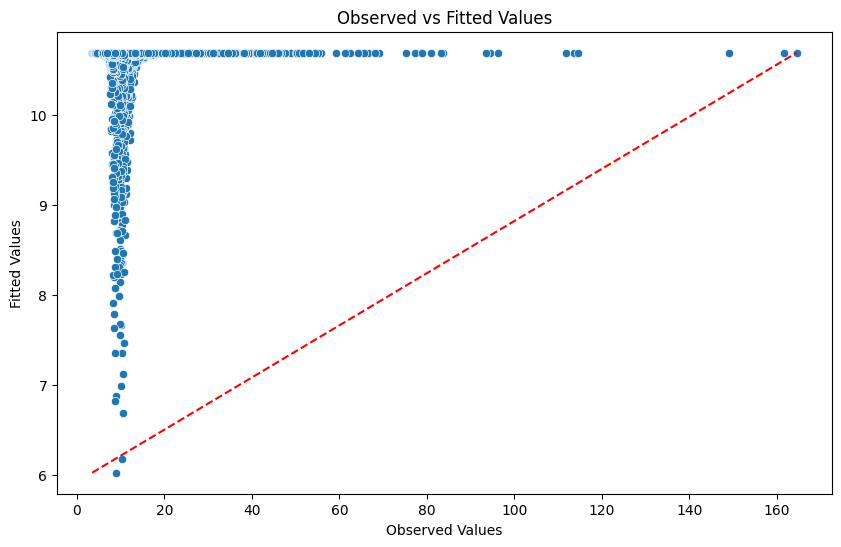

In [10]:

plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Avg_LOS'], y=fitted)
plt.xlabel('Observed Values')
plt.ylabel('Fitted Values')
plt.title('Observed vs Fitted Values')
plt.plot([min(df['Avg_LOS']), max(df['Avg_LOS'])], [min(fitted), max(fitted)], color='red', linestyle='--')
plt.show()




Here is a visualization of the test for observed and fitted values. As can be seen, many of the points are congregating towards the left of the graph and upwards. This means that this test may not be well suited to capture the relationship of the independent and dependent variables since many of the points don't follow the dashed line.

In [11]:

W, p_value = shapiro(residuals)
print(f"Shapiro-Wilk Test: W={W}, p-value={p_value}")

Shapiro-Wilk Test: W=0.5588964223861694, p-value=0.0


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


The shapiro-wilk test whiched tested for normality also failed as this p-value is well below 0.05.

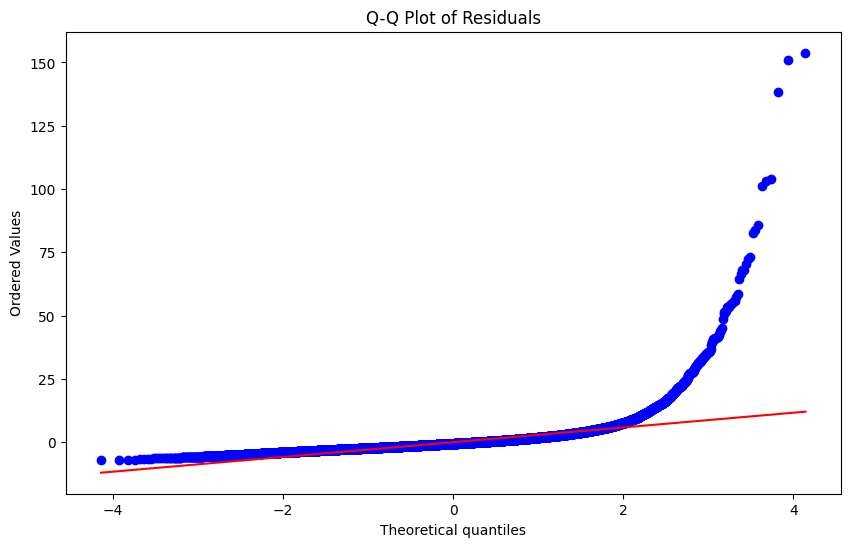

In [12]:

plt.figure(figsize=(10, 6))
stats.probplot(residuals, plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.show()

Another visulaization of the test is the Q-Q plot. Since the points are headed upward that shows that the data has heavier tails than a normal distribution.

In [13]:

gq_test = het_goldfeldquandt(residuals, results.model.exog)
print(f"Goldfeld-Quandt Test: F-statistic={gq_test[0]}, p-value={gq_test[1]}")

Goldfeld-Quandt Test: F-statistic=0.32006806724120523, p-value=0.9999999999999999


For the Goldfeld-Quandt Test which tested for homogeneity of variance, according to this the p-value is greater than 0.05 and so that means this test did not fail like the others.

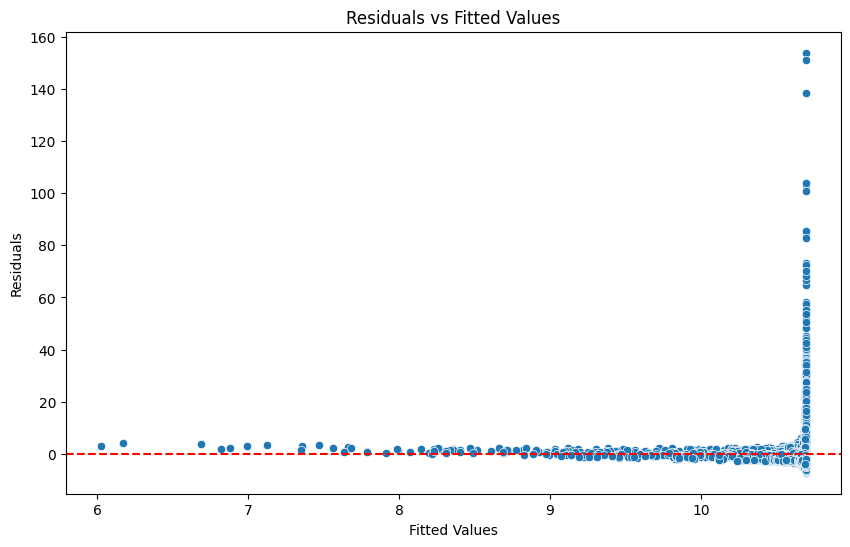

In [14]:

plt.figure(figsize=(10, 6))
sns.scatterplot(x=fitted, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.show()

As can be seen by the graph the variance of the residuals is not constant across different levels of the independent variable as many of the points congregate towards the right side of it and upwards.